# 多腕バンディット問題を強化学習で解決
### ε-greedyとUCB1のアルゴリズムを使う

■ε-greedy<br>
シュミレーションを繰り返すと少しずつ高い報酬を取るようになる
グラフだと右肩上がりになる

■UCB1<br>
シュミレーションの最初から高い報酬を取ったり後になると低い報酬になったりする<br>
グラフだとジグザクになる<br>
しかしどの結果もε-greedyより高い報酬を得るようになる



In [0]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# スロットアームの作成
class SlotArm():
  # 初期化
  def __init__(self, p):
    # コインが出る確率
    self.p = p

  # アームを選択した時の報酬の取得
  def draw(self):
    if self.p > random.random():
      return 1.0
    else:
      return 0.0

In [0]:
# ε-greedyの計算処理作成
class EpsilonGreedy():
  # 初期化
  def __init__(self, epsilon):
    # 探索する確率
    self.epsilon = epsilon

  # 試行回数、価値のリセット
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms)
    self.v = np.zeros(n_arms)

  # アーム選択
  def select_arm(self):
    if self.epsilon > random.random():
      # ランダムアームを選択
      return np.random.randint(0, len(self.v))
    else:
      # 価値が高いアームを更新
      return np.argmax(self.v)

  # アルゴリズムのパラメータ更新
  def update(self, chosen_arm, reward, t):
    self.n[chosen_arm] += 1
    n = self.n[chosen_arm]
    v = self.v[chosen_arm]

    self.v[chosen_arm] = ((n - 1) / float(n)) * v + (1 / float(n)) * reward

  # 文字列情報の取得
  def label(self):
    return 'ε-greedy('+str(self.epsilon)+')'

In [0]:
# UCB1アルゴリズム
class UCB1():
  # 試行回数と成功回数と価値のリセット
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms)
    self.w = np.zeros(n_arms)
    self.v = np.zeros(n_arms)

  # アーム選択
  def select_arm(self):
    for i in range(len(self.n)):
      if self.n[i] == 0:
        return i

    return np.argmax(self.v)

  # パラメータ更新
  def update(self, chosen_arm, reward, t):
    self.n[chosen_arm] += 1

    if reward == 1.0:
      self.w[chosen_arm] += 1

    for i in range(len(self.n)):
      if self.n[i] == 0:
        return

    for i in range(len(self.v)):
      self.v[i] = self.w[i] / self.n[i] + (2 * math.log(t) / self.n[i]) ** 0.5

  # 文字列情報の取得
  def label(self):
    return 'ucb1'

In [0]:
# シュミレーション実行
def play(algo, arms, num_sims, num_time):
  # 履歴用意
  times = np.zeros(num_sims * num_time)
  rewards = np.zeros(num_sims * num_time)

  # ループ
  for sim in range(num_sims):
    algo.initialize(len(arms))

    # ゲーム回数
    for time in range(num_time):
      index = sim * num_time + time

      times[index] = time + 1
      chosen_arm = alog.select_arm()
      reward = arms[chosen_arm].draw()
      rewards[index] = reward

      algo.update(chosen_arm, reward, time+1)

  return [times, rewards]

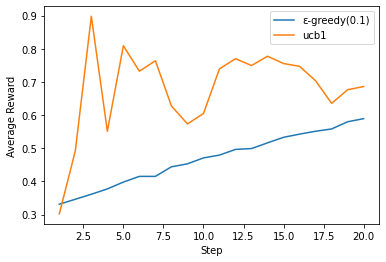

In [0]:
arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))

alogs = (EpsilonGreedy(0.1), UCB1())

for alog in alogs:
  results = play(alog, arms, 10000, 20)

  df = pd.DataFrame({'times': results[0], 'rewards': results[1]})
  mean = df['rewards'].groupby(df['times']).mean()
  plt.plot(mean, label=alog.label())

# グラフの表示
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc='best')
plt.show()